# Instruções

Esse documento é um [Jupyter notebook](http://jupyter.org/), um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (números, texto, figuras, videos, etc).

O notebook te fornecerá exemplos interativos que trabalham os temas abordados no questionário. Utilize esses exemplos para responder as perguntas.

As células com números ao lado, como `In [1]:`, são código [Python](https://www.python.org/). Algumas dessas células não produzem resultado e servem de preparação para os exemplos interativos. Outras, produzem gráficos interativos. **Você deve executar todas as células, uma de cada vez**, mesmo as que não produzem gráficos.

**Para executar uma célula**, clique em cima dela e aperte `SHIFT+ENTER` ou presione o botão de *Run* (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) na barra de ferramentas acima. O foco (contorno verde ou cinza em torno da célula) deverá passar para a célula abaixo. Para rodá-la, aperte `SHIFT+ENTER` novamente e assim por diante. Você pode executar células de texto que não acontecerá nada.

Usando os *widgets* contidos neste notebook, você desenvolverá uma melhor compreensão de quais valores são realmente medidos em um levantamento de resistividade num modo DC (corrente contínua) e como essas medidas podem ser processadas, plotadas, invertidas e interpretadas. Usaremos alguns aplicativos da [GPG](https://gpg.geosci.xyz/index.html), um recurso de aprendizado para geofísica aplicada desenvolvido por pesquisadores e estudantes da University of British Columbia.

# Por que usar Jupyter Notebook? 

Veja o artigo [Interactive notebooks: Sharing the code](http://www.nature.com/polopoly_fs/1.16261!/menu/main/topColumns/topLeftColumn/pdf/515151a.pdf) da revista nature

<p class="alert alert-warning" role="alert"><strong>Atenção!</strong> Esse notebook corresponde a aula <strong>6: Métodos Elétricos </strong> </p>

##### Autor:

* Dr. Oscar Fabian Mojica Ladino ([@ofmla](https://github.com/ofmla))

# Setup

Rode as células abaixo para carregar os módulos necessários para essa prática.

In [1]:
import warnings
warnings.filterwarnings("ignore")
from geoscilabs.dcip.DC_cylinder import cylinder_app
from geoscilabs.dcip.DCLayers import plot_layer_potentials_app
from geoscilabs.dcip.DC_Pseudosections import (
    DC2DPseudoWidget, MidpointPseudoSectionWidget, DC2DfwdWidget
)

# 4. Métodos Elétricos: Método de Resistividade

## Introdução

Há muitos métodos de levantamento elétrico. Alguns fazem uso de campos dentro da Terra, enquanto outros requerem a introdução no solo de correntes geradas artificialmente.
 - **método de resistividade** é usado no estudo de descontinuidades horizontais e verticais nas propiedades elétricas do solo e também na detecção de corpos tridimensionais de condutividade elétrica anômala.
 - **método de polarização induzida** faz uso da ação capacitiva da subsuperfície para localizar zonas onde os minerais condutivos estão disseminados denro de rochas hospedeiras.
 - **método de potencial espontâneo** faz uso de correntes naturais fluindo no solo, que são geradas por processos eletroquímicos, para localizar corpos rasos de condutividade anômala.

## Método de resistividade

Para levantamentos de resistividade DC, a fonte de energia é um gerador que injeta uma corrente constante no solo usando dois eletrodos. Os "sinais de saída" (dados) são voltagens medidas em vários locais da superfície. Os desvios do padrão de diferenças de potencial esperado do solo homogêneo fornecem informações sobre a forma e as propriedades elétricas das inomogeneidades de subsuperfície.

O método de resistividade é sensível à condutividade elétrica $\sigma$ (Siemens/metro). Às vezes trabalha-se com o inverso da condutividade que é a resistividade elétrica $\rho$ que tem unidades $\Omega$m (ohm-metro). A condutividade elétrica caracteriza a facilidade com que a corrente flui através do material quando uma força elétrica é aplicada. 

A condutividade/resistividade elétrica dos materiais da Terra varia em muitas ordens de grandeza. Depende de muitos fatores, incluindo: tipo de rocha, porosidade, conectividade de poros, natureza do fluido e teor metálico da matriz sólida. Uma indicação muito grosseira da faixa de cresistividade para rochas e minerais é apresentada na Figura abaixo
<br />
<br />
<img style="float: center; width: 50%; height: 50%" src="svg/resistividade.svg">
<center>O intervalo aproximado de valores de resistividade dos tipos comuns de rocha. </center>   

## Fluxo de corrente em um modelo de Terra homogeneo 

Considere uma Terra uniforme e um eletrodo, que está injetando uma corrente _I_ para o solo. Queremos encontrar o potencial elétrico dentro do solo a uma distância _r_, da fonte atual. A densidade de corrente no solo está relacionada à corrente de fonte injetada e flui radialmente para fora de sua fonte pontual. O potencial medido em uma superfície definida por _r_ está relacionado ao campo elétrico que existe no solo devido à corrente. Essas duas relações serão combinadas com a forma 3D da lei de Ohm para terminar com uma expressão de condutividade (a propriedade física que queremos) em termos da fonte atual, do potencial medido e da distância.
<br />
<br />
<img style="float: center; width: 50%; height: 50%" src="svg/out2.svg">
<center>Fluxo de corrente de um único eletrodo na superfície. </center>
<br />

Primeiro, por simetria a densidade de corrente fora do hemisfério de raio, *r*

\begin{equation}
J=\dfrac{I}{2\pi r^{2}}
\end{equation}

e a corrente está fluindo em direção radial. Desde $J = \sigma E$ (Lei de Ohm), o campo elétrico também deve estar apontando radialmente para fora. A relação entre o campo elétrico e o potencial é

\begin{equation}
E=-\dfrac{dV(r)}{dr}
\end{equation}

Combinando a expressão para $E$, $J$ e Lei de Ohm, temos
\begin{align}
    J &= \sigma\dfrac{dV(r)}{dr} = \dfrac{I}{2\pi r^{2}}\\
      &\quad \dfrac{dV(r)}{dr} = \dfrac{-I}{2\pi\sigma r^{2}}
\end{align}

O potencial à distância _r_ é, então obtido por integração

\begin{equation}
V(r)=-\dfrac{I}{2\pi\sigma r} + C
\end{equation}

A constante de integração é zero, uma vez que $V(r)=0$ quando $r=\infty$   

## Resistividade aparente

Se houver dois eletrodos de corrente (fonte), o potencial é a superposição dos efeitos de ambos. Em um experimento prático (figura abaixo), um eletrodo, $A$ , é o lado positivo de uma fonte de corrente, e o outro eletrodo, $B$ , é o lado negativo. A corrente em cada eletrodo é igual, mas de sinal oposto. Para uma pesquisa prática, precisamos de dois eletrodos para medir a diferença de potencial. Estes são $M$, o terminal positivo do voltímetro (o mais próximo ao eletrodo de corrente $A$ ), e $N$, o terminal negativo do voltímetro.
<br />
<br />
<img style="float: center; width: 50%; height: 50%" src="svg/survey-crop.svg">
<center>A forma geral da configuração de eletrodo usada em medições de resistividade. </center>
<br />
O potencial $V_{M}$ num eletrodo interno $M$ é a soma das contribuições dos potenciais $V_{A}$ e $V_{B}$ da fonte de corrente em $A$ e do simidouro em $B$

\begin{equation}
V_{M}=\dfrac{I\rho}{2\pi}\bigg\{\dfrac{1}{r_{AM}}-\dfrac{1}{r_{BM}}\bigg\}
\end{equation}
Simlarmente
\begin{equation}
V_{N}=\dfrac{I\rho}{2\pi}\bigg\{\dfrac{1}{r_{AN}}-\dfrac{1}{r_{BN}}\bigg\}
\end{equation}

A diferença de potencial $\Delta V= V_{m}-V_{N}$ entre os eletrodos $M$ e $N$ é dada por 

\begin{equation}
\Delta V=\dfrac{I\rho}{2\pi}\bigg\{\dfrac{1}{r_{AM}}-\dfrac{1}{r_{BM}} -\dfrac{1}{r_{AN}}+\dfrac{1}{r_{BN}} \bigg\}
\end{equation}

\begin{equation}
\Delta V=I\rho G
\end{equation}

Na relação final, $G$ é um fator geométrico que depende da geometria dos quatro eletrodos. Finalmente, podemos definir a resistividade aparente rearranjando a última expressão para dar:

\begin{equation}
\rho_{a}=\dfrac{\Delta V}{IG}
\end{equation}

Usamos o termo resistividade aparente $\rho_{a}$ porque é a verdadeira resistividade dos materiais apenas se a Terra for um semiespaço uniforme dentro do alcance do levantamento. Caso contrário, esse número representa alguma média complicada das resistividades de todos os materiais encontrados pelo campo atual.
<img style="float: center; width: 50%; height: 50%" src="svg/4surveys-crop.svg">
<center>Configurações comuns de eletrodos. </center>
<br />

### Modelo do cilindro

 - **survey**: Tipo de levantamento
 - **A**: (+) Localização do eletrodo de corrente
 - **B**: (-) Localização do eletrodo de corrente
 - **M**: (+) Localização do eletrodo de potencial
 - **N**: (-) Localização do eletrodo de potencial
 - **r**: Radio do cilindro
 - **xc**: Localização do centro do cilindro em x
 - **zc**: Localização do centro do cilindro em z
 - **$\rho_1$**: Resistividade do meio
 - **$\rho_2$**: Resistividade do cilindro
 - **Field**: Campo a ser visualizado
 - **Type**: Qual parte do campo
 - **Scale**: Visualização em escala linear ou logaritmica

In [2]:
cylinder_app()


MyApp(children=(ToggleButtons(description='survey', options=('Dipole-Dipole', 'Dipole-Pole', 'Pole-Dipole', 'P…

### Para pensar

* Para qualquer dado espaçamento de eletrodo, que modelo de Terra resultará em tensões (volt) bastante pequenas? um modelo muito resistivo ou muito condutor? 
* A corrente e a tensão (após a remoção do SP) foram medidas como 100 miliamperes e 1 volt em duas configurações de eletrodos, um arranjo dipolo-dipolo e outro do tipo Wenner
  * Qual foi a resistividade aparente para essas medidas no caso do arranjo dipolo-dipolo?
  * Qual foi a resistividade aparente para essas medidas no caso do arranjo Wenner?

## Levantamentos

Dois tipos principais de procedimentos são empregados em levantamentos de resistividade
 - A **Sondagem elétrica vertical- SEV** usada principalmente no estudo de interfaces horizontais o quase horizontais. A corrente e os eletrodos de potencial
    são  mantidos no mesmo espaçamento relativo , e o arranjo todo é progressivamente expandido ao redor de um ponto fixo central. Consequentemente, as leituras são
<br />
<br />
<img style="float: center; width: 60%; height: 60%" src="svg/sev-crop.svg">
<br />
 - O **Caminhamento de separação constante** usado para determinar variações verticais de resistividade. A corrente e os eletrodos de potencial são mantidos a uma separação fixa e progressivamente movidos ao longo do perfil. Esse método é empregado em prospecção mineral para localizar falhas ou zonas de cisalhamento e para detectar corpos localizados de condutividade anômala.
<br />
<br />
<img style="float: center; width: 60%; height: 60%" src="svg/caminhamento-crop.svg">
<br />

## Interpretação da sondagem eletrica vertical

Considere um arranjo de eletrodos de Wenner acima de uma interface horizontal única, entre meios com resistividades $\rho_1$ (superior) e $\rho_2$ (inferior), com $\rho_1>\rho_2$. Para isto usaremos um operador de modelagem implementado na libraria [pyGIMLi](https://www.pygimli.org/index.html). Rodando a proxima célula carregaremos os pacotes necessários para a demonstração. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from pygimli.physics.ves import VESModelling
from pygimli.viewer.mpl import drawModel1D

Definiremos o modelo rodando a seguinte célula

In [4]:
ab2 = np.logspace(-1, 2, 50)  # AB/2 distância (eletrodos de corrente)
mn2 = ab2 / 3.  # MN/2 distância (eletrodos de potencial)
print (ab2)
print (mn2)

[  0.1          0.11513954   0.13257114   0.1526418    0.17575106
   0.20235896   0.23299518   0.26826958   0.30888436   0.35564803
   0.40949151   0.47148664   0.54286754   0.62505519   0.71968567
   0.82864277   0.95409548   1.09854114   1.26485522   1.45634848
   1.67683294   1.93069773   2.22299648   2.55954792   2.9470517
   3.39322177   3.90693994   4.49843267   5.17947468   5.96362332
   6.86648845   7.90604321   9.10298178  10.48113134  12.06792641
  13.89495494  15.9985872   18.42069969  21.20950888  24.42053095
  28.11768698  32.37457543  37.2759372   42.9193426   49.41713361
  56.89866029  65.51285569  75.43120063  86.85113738 100.        ]
[3.33333333e-02 3.83798466e-02 4.41903789e-02 5.08805989e-02
 5.85836875e-02 6.74529883e-02 7.76650604e-02 8.94231932e-02
 1.02961453e-01 1.18549344e-01 1.36497169e-01 1.57162212e-01
 1.80955848e-01 2.08351731e-01 2.39895224e-01 2.76214258e-01
 3.18031825e-01 3.66180381e-01 4.21618406e-01 4.85449493e-01
 5.58944312e-01 6.43565910e-01 7.40

Inicializaremos o operador de modelagem

In [5]:
fDC = VESModelling(ab2=ab2, mn2=mn2)
synres = [500., 100.]  # resistividade das camadas
synthk = [0.5]  # espessura das camadas (a enésima camada é infinita)

O operador *forward*  pode ser chamado po `fDC.response (model)` ou simplesmente `fDC(model)`

In [6]:
rhoa = fDC.response(synthk+synres)

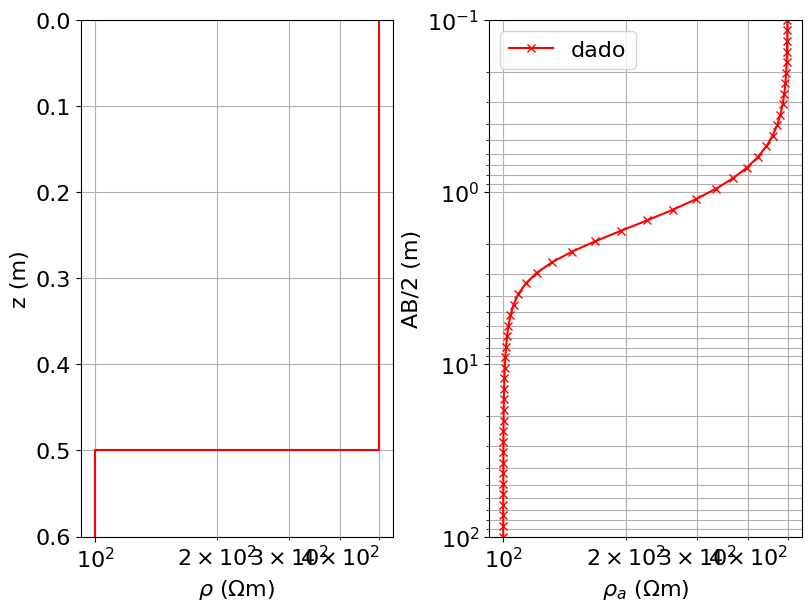

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 6),constrained_layout=True)  # two-column figure
drawModel1D(ax[0], synthk, synres, plot='semilogx', color='r')
ax[0].grid(True, which='both')
ax[0].set_ylabel('z (m)')
ax[0].set_xlabel(r'$\rho$ ($\Omega$m)')
ax[1].loglog(rhoa, ab2, 'rx-', label='dado')  # sounding curve
ax[1].set_ylim((max(ab2), min(ab2)))  # downwards according to penetration
ax[1].grid(True, which='both')
ax[1].set_xlabel(r'$\rho_a$ ($\Omega$m)')
ax[1].set_ylabel('AB/2 (m)')
ax[1].legend(loc='best')
plt.show()

Onde estão presentes três camadas horizontais, as curvas de resistividade aparente são mais complexas

In [8]:
synres = [100., 500., 300.]  # resistividade das camadas
synthk = [0.5,2.]  # espessura das camadas (a enésima camda é infinita)
###
synres1 = [300., 100., 500.]  # resistividade das camadas
synthk1 = [0.5,2.]  # espessura das camadas (a enésima camda é infinita)

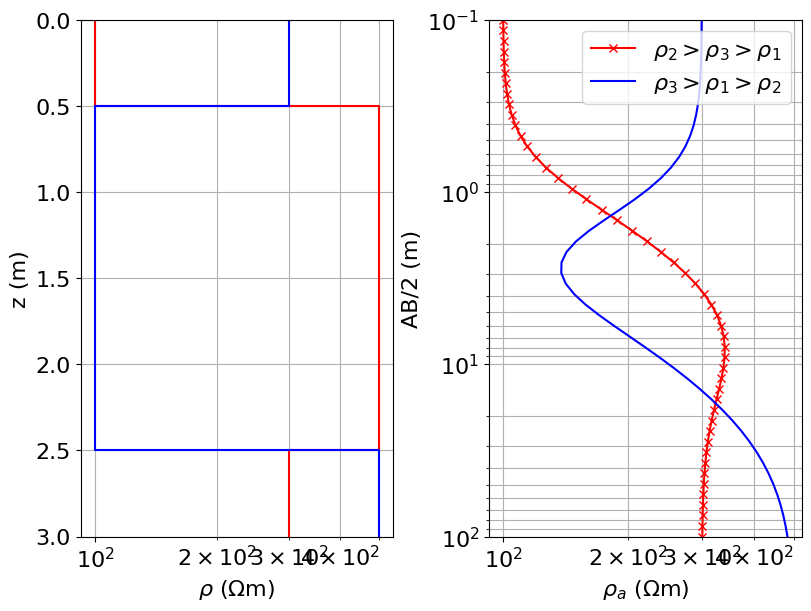

In [9]:
rhoa = fDC(synthk+synres)
rhoa1 = fDC(synthk1+synres1)
###
fig, ax = plt.subplots(ncols=2, figsize=(8, 6),constrained_layout=True)  # two-column figure
drawModel1D(ax[0], synthk, synres, plot='semilogx', color='r')
drawModel1D(ax[0], synthk1, synres1, color='b')
ax[0].grid(True, which='both')
ax[0].set_ylabel('z (m)')
ax[0].set_xlabel(r'$\rho$ ($\Omega$m)')
ax[1].loglog(rhoa, ab2, 'rx-', label=r'$\rho_2>\rho_3>\rho_1$')  # sounding curve
ax[1].loglog(rhoa1, ab2, 'b-', label=r'$\rho_3>\rho_1>\rho_2$') 
ax[1].set_ylim((max(ab2), min(ab2)))  # downwards according to penetration
ax[1].grid(True, which='both')
ax[1].set_xlabel(r'$\rho_a$ ($\Omega$m)')
ax[1].set_ylabel('AB/2 (m)')
ax[1].legend(loc='best')
plt.show()

### Calculo da resistividade aparente

Na prática, não podemos medir os potenciais em todos os lugares, estamos limitados aos locais onde colocamos eletrodos. Para cada fonte (par de eletrodos de corrente) muitas diferenças de potencial são medidas entre os pares de eletrodos M e N para caracterizar a distribuição geral dos potenciais. O *widget* abaixo permite visualizar os potenciais, campos elétricos e densidades de corrente de uma fonte dipolo em um modelo simples com 2 camadas. Para diferentes configurações de eletrodos, você pode medir as diferenças de potencial e ver as resistividades aparentes calculadas.

No gráfico superior, a localização do eletrodo A é marcada pelo + vermelho , o eletrodo B é marcado pelo - azul, e os eletrodos de potencial M/N são marcados pelos pontos pretos. Os potenciais de $V_M$ e $V_N$ são impressos logo acima e à direita dos pontos pretos. A resistividade aparente calculada é mostrada na caixa cinza à direita. O gráfico inferior pode mostrar o modelo de resistividade, os campos elétricos (e), potenciais ou densidades de corrente (j) dependendo de qual botão de alternância é selecionado. Temos que esperar um pouco para que os gráficos sejam atualizados após os parâmetros terem sido alterados.

 - **A**: (+) Localização do eletrodo de corrente
 - **B**: (-) Localização do eletrodo de corrente
 - **M**: (+) Localização do eletrodo de potencial
 - **N**: (-) Localização do eletrodo de potencial
 - **$\rho_1$**: Resistividade da camada superior
 - **$\rho_2$**: Resistividade da camada inferior
 - **h**: Espessura da camada superior
 - **Plot**: Campo a ser visualizado

In [10]:
plot_layer_potentials_app()

MyApp(children=(FloatSlider(value=-30.0, continuous_update=False, description='A', max=40.0, min=-40.0, step=1…

## Construindo  Pseudosseções

Geralmente, os perfis 2D são plotados como pseudo-seções, estendendo linhas inclinadas a $45^{\circ}$ para baixo a partir dos pontos médios dos pares de eletrodos, de potencial e de corrente A-B e M-N e plotando o valor correspondente de $\Delta V_{MN}$, $\rho_a$ ou o *misfit* na interseção dessas linhas, conforme mostrado abaixo. Para levantamentos polo-dipolo ou dipolo-polo, linha inclinada a $45^{\circ}$ é simplesmente estendida a partir da localização do polo. Os valores são ,assim desenhados em profundidades que refletem o aumento da profundidade de penetração com o aumento da distância de separação dos eletrodos. Isto fornece uma idéia aproximada da região amostrada por cada ponto, mas o eixo vertical de uma pseudo-seção não é uma profundidade real.

No *widget* abaixo, o ponto vermelho marca o ponto médio do dipolo atual ou a localização do eletrodo A em um arranjo polo-dipolo enquanto os pontos verdes marcam os pontos médios dos dipolos de potencial ou a localização do eletrodo M em um arranjo do tipo dipolo-polo. Os pontos azuis marcam a localização na pseudo-seção onde as linhas dos pontos médios do transmissor (Tx) e o receptor (Rx) se cruzam e os dados são plotados. Ao percorrer o Tx (pares de eletrodos de corrente) usando o controle deslizante, você pode ver como a pseudo-seção é construída

As figuras mostradas abaixo mostram como os pontos em uma pseudo-seção são plotados para arranjos polo-dipolo, dipolo-polo e dipolo-dipolo. O código de cores dos pontos corresponde aos mostrados no *widget*.
<br />
<br />
<img style="float: center; width: 60%; height: 60%" src="https://github.com/geoscixyz/geosci-labs/blob/main/images/dc/PoleDipole.png?raw=true">
<center>Esquema básico para um arranjo polo-dipolo uniformemente espaçado.
<br />
<br />
<br />
<img style="float: center; width: 60%; height: 60%" src="https://github.com/geoscixyz/geosci-labs/blob/main/images/dc/DipolePole.png?raw=true">
<center>Esquema básico para um arranjo dipolo-polo uniformemente espaçado. 
<br />
<br />
<br />
<img style="float: center; width: 60%; height: 60%" src="https://github.com/geoscixyz/geosci-labs/blob/main/images/dc/DipoleDipole.png?raw=true">
<center>Esquema básico para um arranjo dipolo-dipolo uniformemente espaçado.
<br />

In [11]:
MidpointPseudoSectionWidget()

MyApp(children=(IntSlider(value=0, description='i', max=17), Output()), layout=Layout(align_items='stretch', d…

 - **$\rho_1$**: Resistividade do meio
 - **$\rho_2$**: Resistividade do cilindro
 - **xc**: Localização do centro do cilindro em x
 - **zc**: Localização do centro do cilindro em z
 - **r**: Radio do cilindro
 - **surveyType**: Tipo de levantamento
 
 ###  **Este aplicativo pode ser lento. Você precisa pressionar *Run Interact* para atualizar a figura depois de fazer modificações nos parâmetros**

In [12]:
DC2DPseudoWidget()

interactive(children=(BoundedFloatText(value=1000.0, description='$\\rho_1$', max=1000.0, min=10.0), BoundedFl…

## Inversão Parametrica

Neste *widget* final, você é capaz de realizar a modelagem da resistividade aparente de um cilindro embutido em um semi espaço uniforme. Pseudo-seções da resistividade aparente podem ser geradas usando arranjos dipolo-dipolo, polo-dipolo ou dipolo-polo para ver como a geometria de levantamento pode distorcer o tamanho, forma e localização de corpos condutores em uma pseudo-seção. Devido à distorção e artefatos presentes em pseudo-seções tentar interpretá-las diretamente é tipicamente difícil e perigoso devido ao risco de má interpretação. Inverter os dados para encontrar um modelo que se ajuste aos dados observados e seja geologicamente razoável deve ser uma prática padrão. 

Variando sistematicamente os parâmetros do modelo e comparando os plots da resistividade aparente observada versus a predita, uma inversão paramétrica pode ser realizada manualmente para encontrar o modelo que melhor se ajusta. O *misfit* normalizado, que fornece uma medida numérica da diferença entre os dados observados e os dados calculados, é útil para quantificar quão bem o modelo invertido se ajusta aos dados observados. O processo de inversão manual pode ser difícil e demorado, mesmo com pequenos exemplos, como o apresentado aqui. Portanto, algoritmos de otimização numérica são tipicamente utilizados para minimizar a diferença (*misfit*) entre os dados através de uma função objetivo, que fornece informações sobre a estrutura e complexidade do modelo, a fim de encontrar uma solução ótima.

Definição de variaveis:
- **$\rho_1$**: Resistividade do meio
- **$\rho_2$**: Resistividade do cilindro
- **xc**: Localização do centro do cilindro em x
- **zc**: Localização do centro do cilindro em z
- **r**: Radio do cilindro
- **predmis**: Botão de alternância que permite trocar o painel inferior da resistividade aparente calculada para o *misfit* normalizado
- **suveyType**: Botão de alternância que permite escolher entre os tipos de arranjos.
 
 ###  **Este aplicativo pode ser lento. Você precisa pressionar *Run Interact* para atualizar a figura depois de fazer modificações nos parâmetros**

In [13]:
DC2DfwdWidget()

MyApp(children=(BoundedFloatText(value=1000.0, description='$\\rho_1$', max=1000.0, min=10.0), BoundedFloatTex…